In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.plot_utils import *

### Loading Data
- Metrica sample Match data
- sample game 1

In [3]:
#event_df = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawEventsData.csv')  
away_df = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv', low_memory=False)
home_df = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv', low_memory=False)

### Preprocessing 

In [4]:
home_df.columns = home_df.loc[1]
home_df.drop([0, 1], inplace = True)

away_df.columns = away_df.loc[1]
away_df.drop([0, 1], inplace = True)


In [5]:
df_col = [str(i) for i in home_df.columns]
df_col = [df_col[i]+'_x' if (df_col[i].startswith('Player') or df_col[i].startswith('Ball')) else df_col[i] for i in range(len(df_col))]
df_col = [df_col[i-1].split('_x')[0]+'_y' if df_col[i] == 'nan' else df_col[i] for i in range(len(df_col))]

In [6]:
home_df.columns = ['H'+ i.split('Player')[1] if i.startswith('Player') else i for i in df_col]
away_df.columns = ['A'+ i.split('Player')[1] if i.startswith('Player') else i for i in df_col]
home_df = home_df.astype(float)
away_df = away_df.astype(float)

In [7]:

x_col = ['x' in i for i in home_df.columns]
y_col = ['y' in i for i in home_df.columns]

In [8]:
home_df.loc[:,x_col] *= 104
home_df.loc[:,home_df.columns[y_col]] *= 68
away_df.loc[:,away_df.columns[x_col]] *= 104
away_df.loc[:,away_df.columns[y_col]] *= 68

In [9]:
away_df.describe()

,Period,Frame,Time [s],A11_x,A11_y,A1_x,A1_y,A2_x,A2_y,A3_x,...,A10_x,A10_y,A12_x,A12_y,A13_x,A13_y,A14_x,A14_y,Ball_x,Ball_y
count,145006.000000,145006.000000,145006.000000,145006.000000,145006.000000,145006.000000,145006.000000,145006.000000,145006.000000,145006.000000,...,106599.00000,106599.000000,38408.000000,38408.000000,38138.000000,38138.000000,25626.000000,25626.000000,88251.000000,88251.000000
mean,1.508517,72503.500000,2900.140000,51.851628,33.965446,55.132753,35.270932,54.732177,35.913338,58.856625,...,51.58679,34.677425,65.861608,34.108221,54.907287,16.315723,53.595295,31.283040,57.387289,34.071315
std,0.499929,41859.770904,1674.390836,41.164495,4.689450,24.016726,13.262788,22.944283,8.415148,22.683682,...,22.44168,12.216004,15.688563,9.634078,19.447424,8.841497,18.264897,12.162248,24.955840,18.958519
min,1.000000,1.000000,0.040000,-2.540720,12.455560,-0.588640,-1.712240,-1.344720,7.380720,-1.079520,...,-1.69104,1.719040,14.885520,6.166920,8.366800,-1.251880,11.255920,4.607680,-4.729920,-2.713880
25%,1.000000,36252.250000,1450.090000,12.113140,31.904240,39.487760,25.623080,39.533520,30.772720,44.333120,...,36.01468,25.893040,56.837040,28.533820,41.724280,9.577970,44.204680,22.149640,39.859560,17.243440
50%,2.000000,72503.500000,2900.140000,29.482960,33.216640,53.986400,36.520080,52.986960,35.647980,58.658600,...,50.53152,34.287640,64.444120,33.300960,54.571920,15.744720,52.294840,30.261360,58.357520,33.953080
75%,2.000000,108754.750000,4350.190000,93.199600,35.185920,71.596720,45.317240,71.518720,40.468670,75.761920,...,65.89960,43.301040,76.753040,37.825170,67.565420,22.902400,67.221180,39.163410,74.078160,49.837200
max,2.000000,145006.000000,5800.240000,107.046160,67.147280,105.525680,71.400000,103.224160,68.731000,105.850160,...,101.94912,68.258400,104.810160,67.326800,104.999440,66.335360,95.097600,66.989520,110.235840,70.571760


In [10]:
df = pd.concat([home_df, away_df.iloc[:,3:]], axis=1)

### Scailing coordinates

In [11]:
from src.plot_utils import draw_pitch

In [12]:
location = np.array(df[df['Frame'] == 1].iloc[:, 3:].dropna(axis=1))[0]
location = [(location[2*i], location[2*i+1]) for i in range(22)]

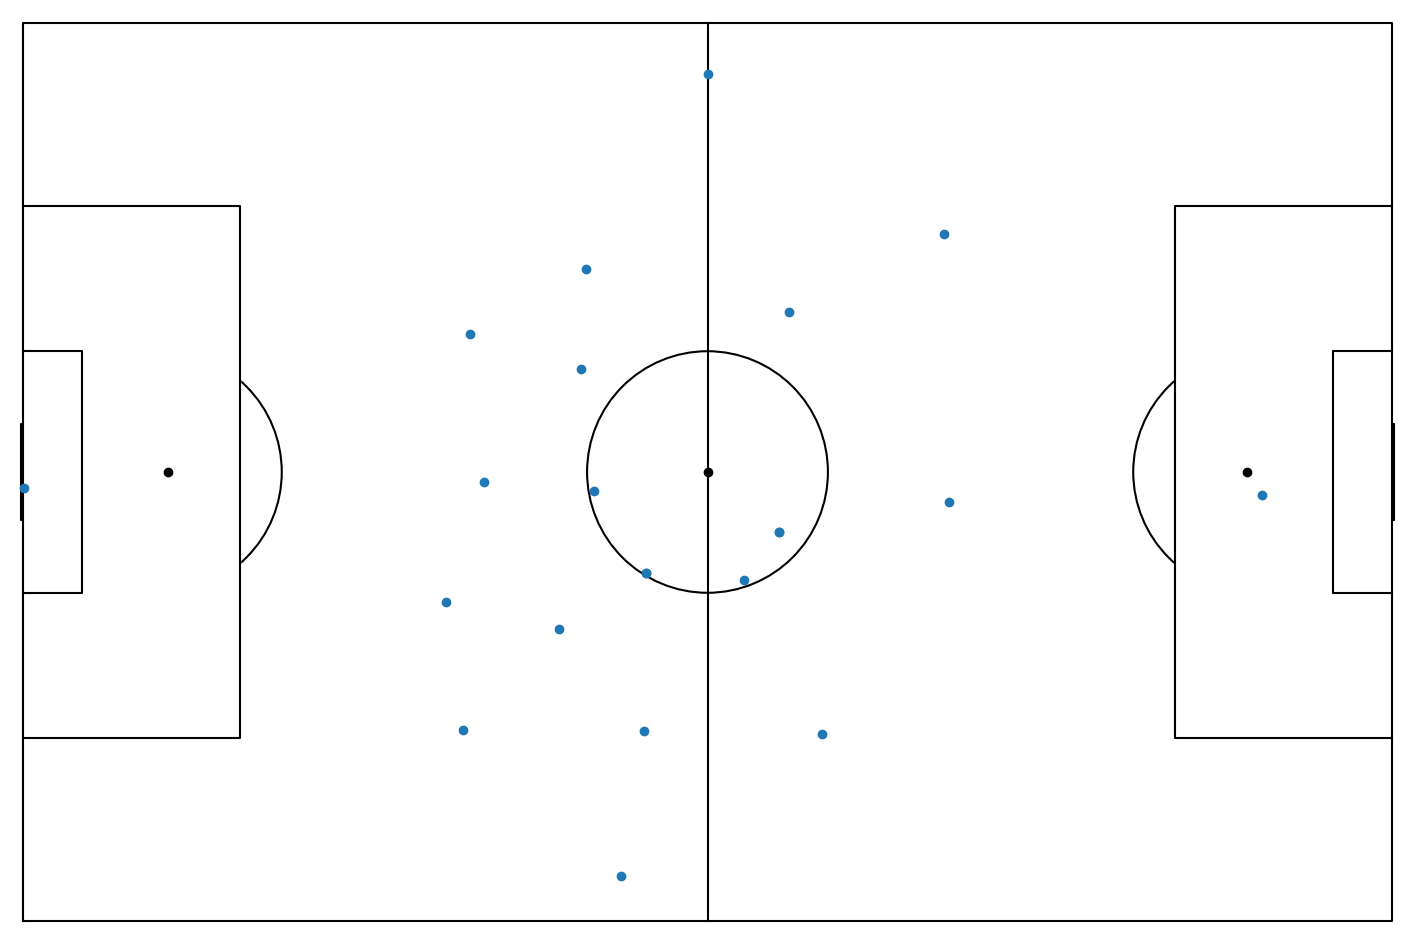

In [13]:
draw_pitch('white', 'black', size_x=18, size_y=12)
plt.scatter([i[0]for i in location], [i[1] for i in location])

### Saving preprocessed data

In [14]:
df.iloc[:, :-2].head()

,Period,Frame,Time [s],H11_x,H11_y,H1_x,H1_y,H2_x,H2_y,H3_x,...,A9_x,A9_y,A10_x,A10_y,A12_x,A12_y,A13_x,A13_y,A14_x,A14_y
2,1.0,1.0,0.04,0.08528,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,...,45.44072,3.40136,39.34632,18.62044,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,0.08,0.09984,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,...,45.44072,3.40136,39.34632,18.62044,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,3.0,0.12,0.11856,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,...,45.44072,3.40136,39.34632,18.62044,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,4.0,0.16,0.12584,32.80184,33.92688,44.41556,35.03448,33.31184,32.18176,...,45.38976,3.42584,39.26624,18.68164,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,5.0,0.20,0.13416,32.80184,33.90088,44.38292,35.01056,33.33224,32.18592,...,45.32320,3.38436,39.16952,18.72924,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.iloc[:, :-2].to_json('./Data/sample_match_1.json')

### Game2, Game3 preprocessing

In [18]:
def sample_match_load(match_no):
    #event_df = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawEventsData.csv')  
    away_df = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_{}/Sample_Game_{}_RawTrackingData_Away_Team.csv'.format(match_no, match_no), low_memory=False)
    home_df = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_{}/Sample_Game_{}_RawTrackingData_Home_Team.csv'.format(match_no, match_no), low_memory=False)
    home_df.columns = home_df.loc[1]
    home_df.drop([0, 1], inplace = True)

    away_df.columns = away_df.loc[1]
    away_df.drop([0, 1], inplace = True)

    h_col = [str(i) for i in home_df.columns]
    h_col = [h_col[i]+'_x' if (h_col[i].startswith('Player') or h_col[i].startswith('Ball')) else h_col[i] for i in range(len(h_col))]
    h_col = [h_col[i-1].split('_x')[0]+'_y' if h_col[i] == 'nan' else h_col[i] for i in range(len(h_col))]

    a_col = [str(i) for i in away_df.columns]
    a_col = [a_col[i]+'_x' if (a_col[i].startswith('Player') or a_col[i].startswith('Ball')) else a_col[i] for i in range(len(a_col))]
    a_col = [a_col[i-1].split('_x')[0]+'_y' if a_col[i] == 'nan' else a_col[i] for i in range(len(a_col))]

    home_df.columns = ['H'+ i.split('Player')[1] if i.startswith('Player') else i for i in h_col]
    away_df.columns = ['A'+ i.split('Player')[1] if i.startswith('Player') else i for i in a_col]
    home_df = home_df.astype(float)
    away_df = away_df.astype(float)

    home_df.loc[:,[i for i in home_df.columns if 'x' in i]] *= 104
    home_df.loc[:,[i for i in home_df.columns if 'y' in i]] *= 68
    away_df.loc[:,[i for i in away_df.columns if 'x' in i]] *= 104
    away_df.loc[:,[i for i in away_df.columns if 'y' in i]] *= 68

    df = pd.concat([home_df, away_df.iloc[:,3:]], axis=1)
    df.iloc[:, :-2].to_json('./Data/sample_match_{}.json'.format(match_no))

    return df

In [19]:
df = sample_match_load(2)